In [17]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


Barkın Köroğlu - 18070001047

Load the data, summarize the data. i.e missing values, frequency of values, counts. Splice features and class

In [28]:
import pandas as pd
df = pd.read_csv('car_evaluation.csv')

# Summarize the data
print(df.describe())

#Check for missing values
missing_values = ["N/A", "na", "?", ""]
data = pd.read_csv("car_evaluation.csv", na_values=missing_values)
print("\n Missing Values:")
print(data.isnull().sum())

# X = data.drop('buyingPrice', axis=1) # drop the class column
# y = data['MaintenanceCost'] # select the class column
# datafeaturenames=list(data.columns[0:7]) #Select features
# classnames=list(data.decision.unique()) # Select uniqe class for a feature

# Split features and class
X=df.iloc[:,0:7]
y=df.iloc[:,6]

print("\n Features",X)


       buyingPrice MaintenanceCost numberOFDoors numberOfPersons lugBoot  \
count         1728            1728          1728            1728    1728   
unique           4               4             4               3       3   
top          vhigh           vhigh             2               2   small   
freq           432             432           432             576     576   

       Safety decision  
count    1728     1728  
unique      3        4  
top       low    unacc  
freq      576     1210  

 Missing Values:
buyingPrice        0
MaintenanceCost    0
numberOFDoors      0
numberOfPersons    0
lugBoot            0
Safety             0
decision           0
dtype: int64

 Features      buyingPrice MaintenanceCost numberOFDoors numberOfPersons lugBoot Safety  \
0          vhigh           vhigh             2               2   small    low   
1          vhigh           vhigh             2               2   small    med   
2          vhigh           vhigh             2               2

In [ ]:
pip install ydata-profiling

Load the data, summarize the data. i.e missing values, frequency of values, counts. Splice features and class (by using Profile Report)

In [10]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

categorical values 

In [19]:
import numpy as np
df_categorical = df.select_dtypes(exclude=[np.number])
print (df_categorical)

     buyingPrice MaintenanceCost numberOFDoors numberOfPersons lugBoot Safety  \
0          vhigh           vhigh             2               2   small    low   
1          vhigh           vhigh             2               2   small    med   
2          vhigh           vhigh             2               2   small   high   
3          vhigh           vhigh             2               2     med    low   
4          vhigh           vhigh             2               2     med    med   
...          ...             ...           ...             ...     ...    ...   
1723         low             low         5more            more     med    med   
1724         low             low         5more            more     med   high   
1725         low             low         5more            more     big    low   
1726         low             low         5more            more     big    med   
1727         low             low         5more            more     big   high   

     decision  
0       una

Convert categorical values into numerical values using any method you see fit (LabelEncoder)

In [20]:
from sklearn.preprocessing import LabelEncoder
datasetLabel = df
df_categorical_columns = df_categorical.columns

print (datasetLabel[df_categorical_columns].head(5))
df_classnames=df['decision'].unique()
label_encoder = LabelEncoder()

for i in df_categorical_columns:
    datasetLabel[i] = label_encoder.fit_transform(datasetLabel[i])

print("Label Encoded Data: ")
print(datasetLabel.head(5))

  buyingPrice MaintenanceCost numberOFDoors numberOfPersons lugBoot Safety  \
0       vhigh           vhigh             2               2   small    low   
1       vhigh           vhigh             2               2   small    med   
2       vhigh           vhigh             2               2   small   high   
3       vhigh           vhigh             2               2     med    low   
4       vhigh           vhigh             2               2     med    med   

  decision  
0    unacc  
1    unacc  
2    unacc  
3    unacc  
4    unacc  
Label Encoded Data: 
   buyingPrice  MaintenanceCost  numberOFDoors  numberOfPersons  lugBoot  \
0            3                3              0                0        2   
1            3                3              0                0        2   
2            3                3              0                0        2   
3            3                3              0                0        1   
4            3                3              0      

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

df_featurenames=list(datasetLabel.columns[0:6])
print(df_classnames)
X=datasetLabel.iloc[:,0:6]
y =datasetLabel.iloc[:,6]
print(X)
print(y)



['unacc' 'acc' 'vgood' 'good']
      buyingPrice  MaintenanceCost  numberOFDoors  numberOfPersons  lugBoot  \
0               3                3              0                0        2   
1               3                3              0                0        2   
2               3                3              0                0        2   
3               3                3              0                0        1   
4               3                3              0                0        1   
...           ...              ...            ...              ...      ...   
1723            1                1              3                2        1   
1724            1                1              3                2        1   
1725            1                1              3                2        0   
1726            1                1              3                2        0   
1727            1                1              3                2        0   

      Safety  
0    

In [22]:
classification_method = tree.DecisionTreeClassifier()
classification_model= classification_method.fit(X,y)

tree_rules=tree.export_text(classification_model,feature_names=df_featurenames)
print(tree_rules)

|--- numberOfPersons <= 0.50
|   |--- class: 2
|--- numberOfPersons >  0.50
|   |--- Safety <= 0.50
|   |   |--- buyingPrice <= 2.50
|   |   |   |--- buyingPrice <= 0.50
|   |   |   |   |--- MaintenanceCost <= 2.50
|   |   |   |   |   |--- numberOFDoors <= 0.50
|   |   |   |   |   |   |--- lugBoot <= 1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- lugBoot >  1.50
|   |   |   |   |   |   |   |--- numberOfPersons <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- numberOfPersons >  1.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- numberOFDoors >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- MaintenanceCost >  2.50
|   |   |   |   |   |--- class: 2
|   |   |   |--- buyingPrice >  0.50
|   |   |   |   |--- MaintenanceCost <= 2.50
|   |   |   |   |   |--- lugBoot <= 1.50
|   |   |   |   |   |   |--- MaintenanceCost <= 0.50
|   |   |   |   |   |   |   |--- buyingPrice <= 1.50
|   |  

 Using DecisionTreeClassifier, default parameters, visualize the decision tree 

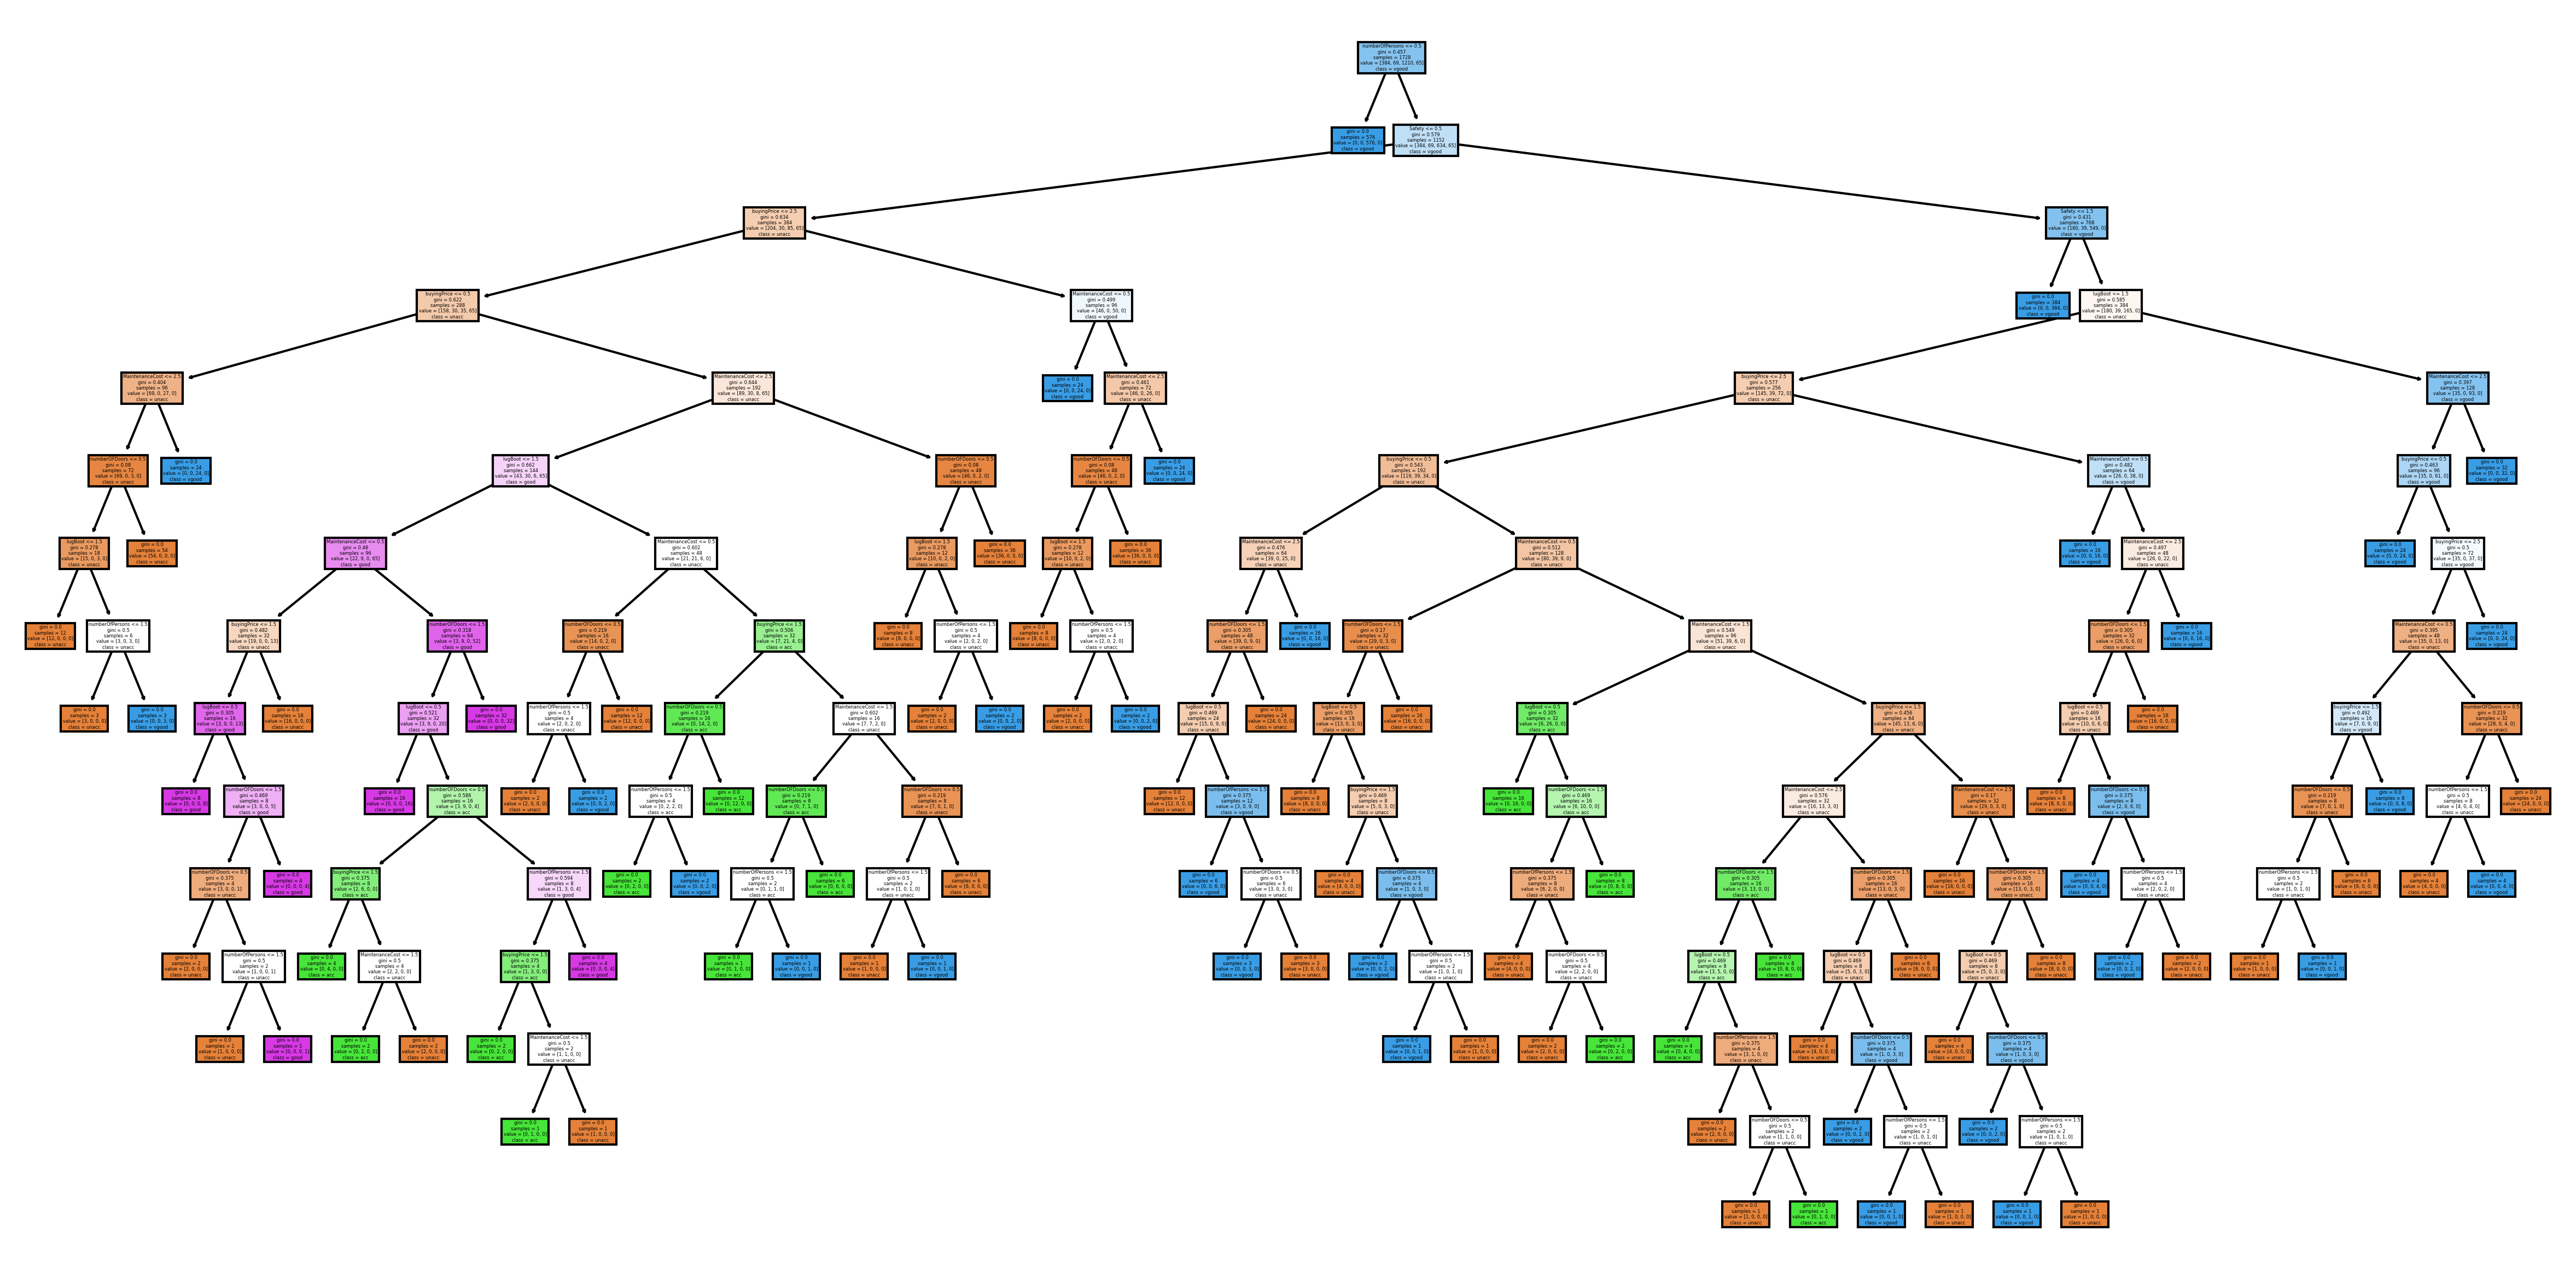

In [23]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=300)
axes.autoscale(enable=True)
tree_graph=tree.plot_tree(classification_model,filled=True,feature_names=df_featurenames,class_names=df_classnames)

Evaluate accuracy of DecisionTreeClassifier using holdout method (this wasnt mentioned in the class, I added it in classwork, please see there) using 70/30 train/test split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train Decision Tree Classifer
classification_model_holdout = classification_method.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classification_model_holdout.predict(X_test)

print("Holdout Accuracy:",metrics.accuracy_score(y_test, y_pred))

Holdout Accuracy: 0.9691714836223507


 Evaluate accuracy of DecisionTreeClassifier and find the best parameters for DecisionTreeClassifier 

In [26]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion': ['gini'], 'max_depth': range(1,10)},
              {'criterion': ['entropy'], 'max_depth': range(1,10)}]
classification_method= GridSearchCV(classification_method, parameters, cv=10)
classification_method.fit(X, y)


means = classification_method.cv_results_['mean_test_score']
stds = classification_method.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, classification_method.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

print("Best parameters:",classification_method.best_params_)

0.700 (+/-0.003) for {'criterion': 'gini', 'max_depth': 1}
0.769 (+/-0.110) for {'criterion': 'gini', 'max_depth': 2}
0.722 (+/-0.136) for {'criterion': 'gini', 'max_depth': 3}
0.785 (+/-0.144) for {'criterion': 'gini', 'max_depth': 4}
0.780 (+/-0.173) for {'criterion': 'gini', 'max_depth': 5}
0.777 (+/-0.136) for {'criterion': 'gini', 'max_depth': 6}
0.852 (+/-0.196) for {'criterion': 'gini', 'max_depth': 7}
0.843 (+/-0.190) for {'criterion': 'gini', 'max_depth': 8}
0.852 (+/-0.204) for {'criterion': 'gini', 'max_depth': 9}
0.700 (+/-0.003) for {'criterion': 'entropy', 'max_depth': 1}
0.769 (+/-0.110) for {'criterion': 'entropy', 'max_depth': 2}
0.722 (+/-0.136) for {'criterion': 'entropy', 'max_depth': 3}
0.811 (+/-0.170) for {'criterion': 'entropy', 'max_depth': 4}
0.787 (+/-0.171) for {'criterion': 'entropy', 'max_depth': 5}
0.793 (+/-0.123) for {'criterion': 'entropy', 'max_depth': 6}
0.843 (+/-0.190) for {'criterion': 'entropy', 'max_depth': 7}
0.864 (+/-0.179) for {'criterion': 